In [15]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2024_02_17_20_19_05_lp'
env_name = 'myoLegReachFixed-v2'
steps = 1000
pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [60, 70, 80, 90]

In [29]:
AP_pert = []
AP_pert_1, ML_pert_1= [], []#this is only used for the scatter stand/fall plot
ML_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP= [], [], [], []
pert_1_ML, pert_2_ML, pert_3_ML, pert_4_ML = [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert.append(data)
        if bins[0] <= data['modelInfo']['perturbationMagnitude'] <= bins[1]:
            pert_1_AP.append(data)
        elif bins[1] <= data['modelInfo']['perturbationMagnitude'] <= bins[2]:
            pert_2_AP.append(data)
        elif bins[2] <= data['modelInfo']['perturbationMagnitude'] <= bins[3]:
            pert_3_AP.append(data)
        elif bins[3] <= data['modelInfo']['perturbationMagnitude'] <= bins[4]:
            pert_4_AP.append(data)
    else:
        ML_pert.append(data)
        if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10:
            pert_1_ML.append(data)
        elif 10 <= data['modelInfo']['perturbationMagnitude'] <= 20:
            pert_2_ML.append(data)
        elif 20 <= data['modelInfo']['perturbationMagnitude'] <= 30:
            pert_3_ML.append(data)
        elif 30 <= data['modelInfo']['perturbationMagnitude'] <= 40:
            pert_4_ML.append(data)

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP]

plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":15}) 

Text(0.5, 0.98, 'COM Velocity change')

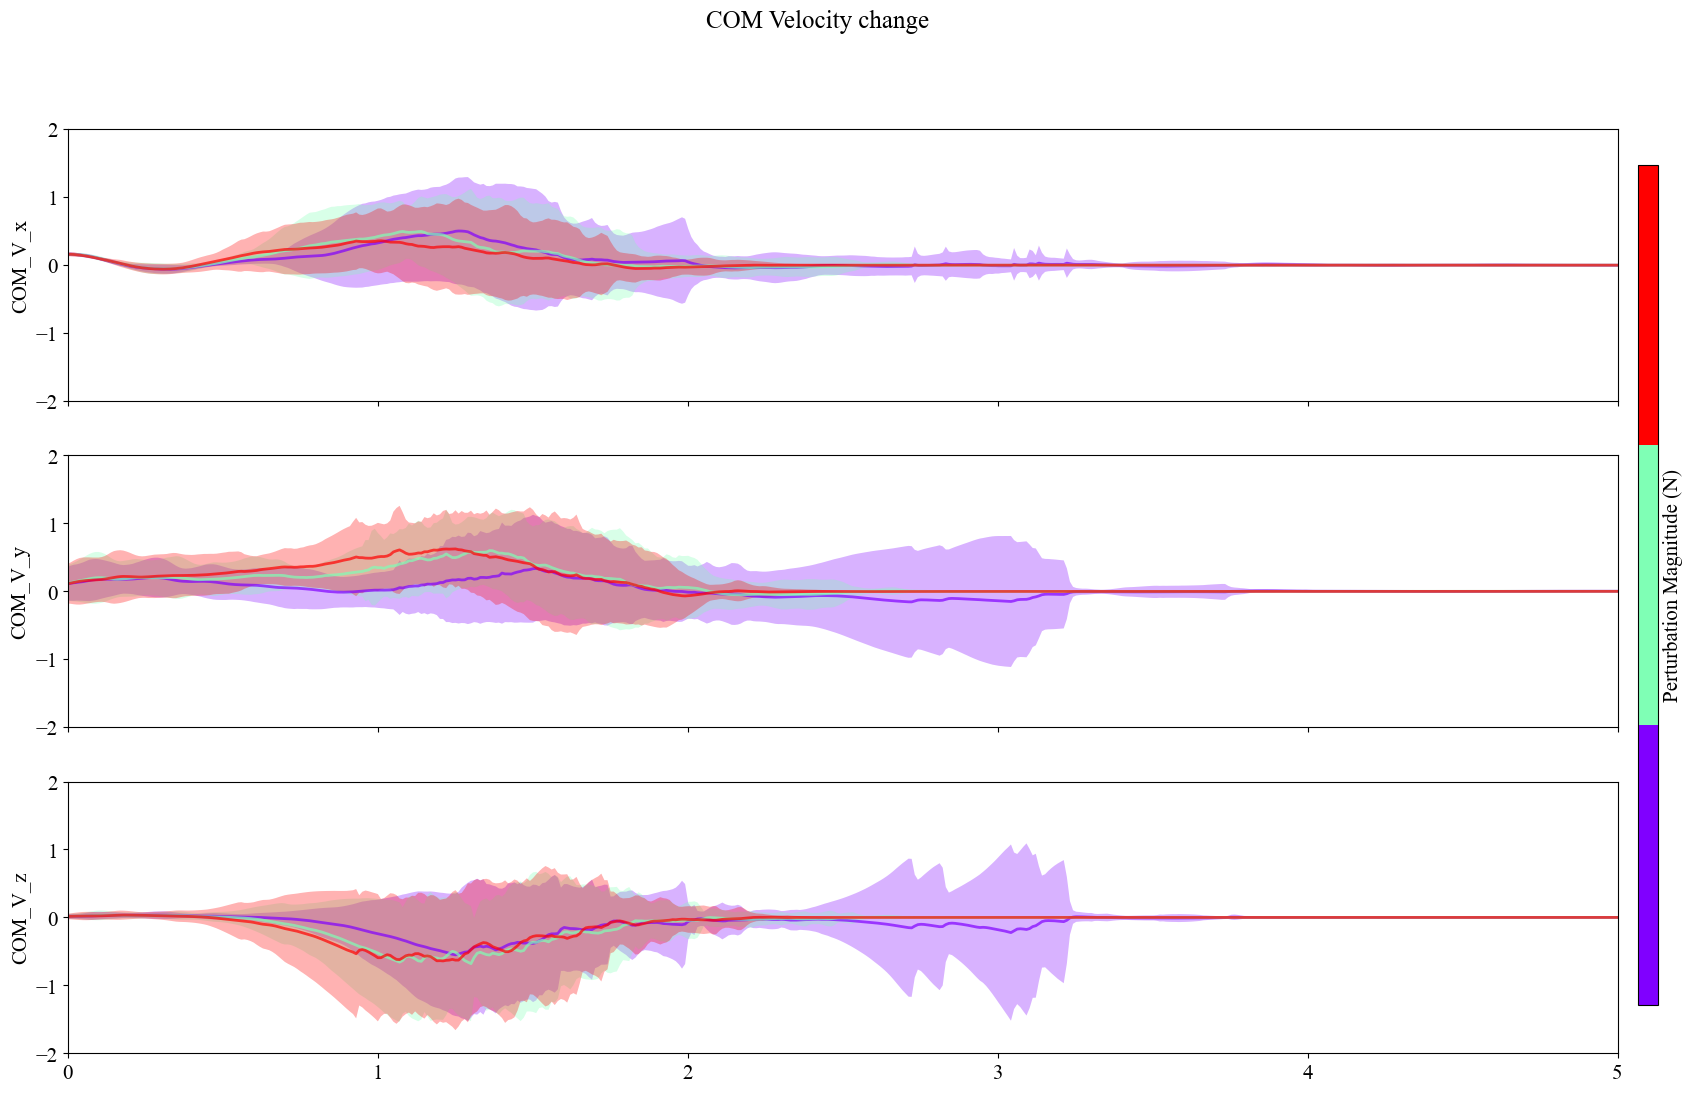

In [47]:
x_time =np.linspace(0, 9, 900)
colormap = plt.cm.rainbow
norm = mcolors.BoundaryNorm(bins, colormap.N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)
for j in range(len(pert_AP)):
    l1, l2, l3, l4 = [], [], [], []
    l = [l1, l2, l3, l4]
    mean_pert = []
    for k in pert_AP[j]:
        l[j].append(k['bodyInfo']['com_v'])
        mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
    if not l[j]:
        continue
    else:
        mean = np.mean(l[j], axis = 0)
        std = np.std(l[j], axis = 0)
        upper_x = mean[100:,0] + 2*std[100:,0]
        lower_x = mean[100:,0] - 2*std[100:,0]
        upper_y = mean[100:,1] + 2*std[100:,1]
        lower_y = mean[100:,1] - 2*std[100:,1]
        upper_z = mean[100:,2] + 2*std[100:,2]
        lower_z = mean[100:,2] - 2*std[100:,2]
        ax[0].set_ylabel(f'COM_V_x')
        ax[0].plot(x_time, np.mean(l[j], axis= 0)[100:,0], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[0].fill_between(x_time, lower_x.flatten(), upper_x.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[1].set_ylabel(f'COM_V_y')
        ax[1].plot(x_time, np.mean(l[j], axis= 0)[100:,1], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[1].fill_between(x_time, lower_y.flatten(), upper_y.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[2].set_ylabel(f'COM_V_z')
        ax[2].plot(x_time, np.mean(l[j], axis= 0)[100:,2], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[2].fill_between(x_time, lower_z.flatten(), upper_z.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 50, 6), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

plt.setp(ax, xlim=[0, 5], ylim = [-2, 2])
fig.suptitle('COM Velocity change')

